In [ ]:
# 导入库函数
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
#防止动漫内存太大，报错
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
df = pd.read_csv("city_populations.txt", usecols=['name', 'group', 'year', 'value'])
df.head()

In [ ]:
def randomcolor():
    colorlist = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color =''
    for i in range(6):
        color += random.choice(colorlist)
    return '#'+ color

In [ ]:
#对地区列表进行去重，分类；
area_list1 = set(df['name'])

# color_list用于存放随机生成颜色代码个数
# 因为后面区域个数 要与颜色个数保持一致，这里用了len函数；
color_list =[]
for i in range(len(area_list1)):
    str_1 = randomcolor()

    color_list.append(str_1)
    str_1 = randomcolor()
    
#area_list转化为列表
area_list_1 = [i for i in area_list1]
print(color_list)
print(area_list_1)

In [ ]:
#colors表示 所在城市：颜色 一一对应字典形式；
colors =dict(zip(area_list_1,color_list))
print(colors)

#group_lk为 城市：所在区域 --对应字典形式；
group_lk = df.set_index('name')['group'].to_dict()
print(group_lk)

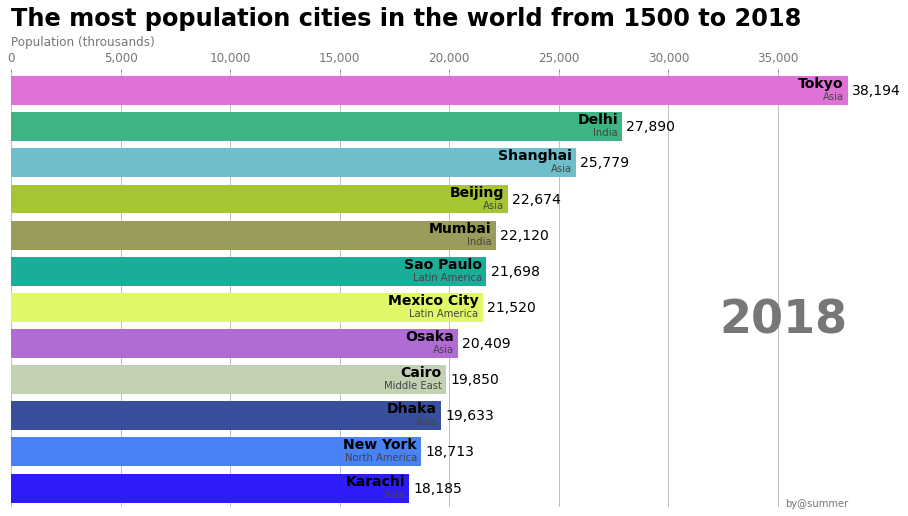

In [31]:
# 用plt加理图表，figsize表示图标长宽，ax表示标签
fig, ax = plt.subplots(figsize=(15, 8))

#dras_barchart生成current_year这一年各城市人口基本情况；
def draw_barchart(current_year):
    
    #dff对year==current_year的行，以value从升序方式排序，取后十名也就是最大值；
    dff = df[df['year'].eq(current_year)].sort_values(by='value',ascending = True).tail(12)
    # 所有坐标、标签清除
    ax.clear()
    #显示颜色、城市名字
    ax.barh(dff['name'],dff['value'],color = [colors[x] for x in dff['name']])
    
    dx = dff['value'].max()/200
    
    #ax.text(x,y,name,font,va,ha)
    # x,y表示位置；
    # name表示显示文本；
    # va,ba分别表示水平位置，垂直放置位置；
    for i ,(value,name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx,i,name,size=14,weight=600,ha ='right',va = 'bottom')
        ax.text(value-dx,i-.25,group_lk[name],size = 10,color ='#444444',ha ='right',va = 'baseline')
        ax.text(value+dx,i ,f'{value:,.0f}',size = 14,ha = 'left',va ='center')
    
    #ax.transAxes表示轴坐标系，(1,0.4)表示放置位置
    ax.text(1,0.4,current_year,transform = ax.transAxes,color ='#777777',size = 46,ha ='right',weight=800) 
    ax.text(0,1.06,'Population (throusands)',transform = ax.transAxes,size=12,color='#777777')
    
    #set_major_formatter表示刻度尺格式；
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x',colors='#777777',labelsize=12)
    ax.set_yticks([])
    #margins表示自动缩放余额；
    ax.margins(0,0.01)
    # 设置后面的网格
    ax.grid(which='major',axis='x',linestyle='-')
    #刻度线和网格线是在图标上方还是下方，True为下方
    ax.set_axisbelow(True)
    ax.text(0,1.15,'The most population cities in the world from 1500 to 2018',
           transform=ax.transAxes,size=24,weight=600,ha='left',va='top')
    ax.text(1,0,'by@summer',transform = ax.transAxes,color ='#777777',ha = 'right',
           bbox = dict(facecolor='white',alpha = 0.8,edgecolor='white'))
    #取消图表周围的方框显示
    plt.box(False)

#绘制2018年各城市人口情况
draw_barchart(2018)

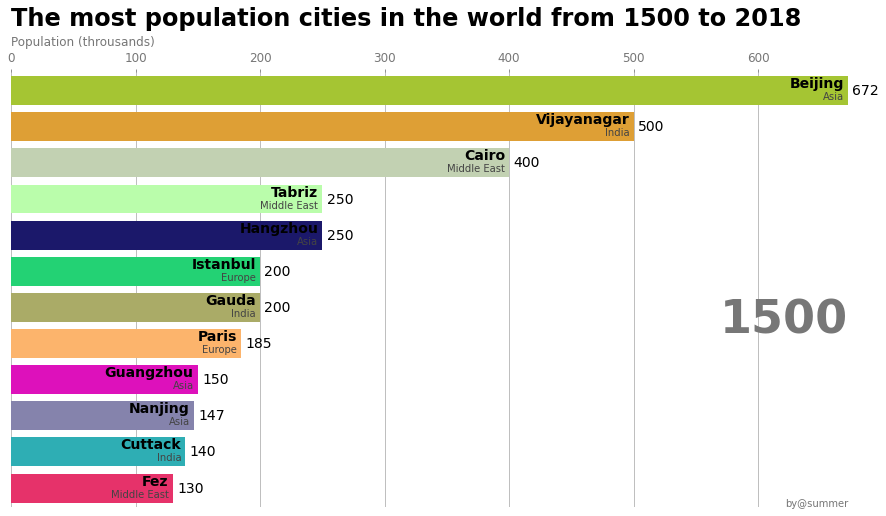

In [32]:
#将原来的静态图拼接成动画
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1500, 2019),interval=100)
#保存到jshtml
#HTML(animator.to_jshtml())

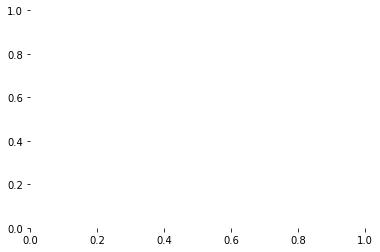

In [33]:
#生成video，并保存至指定文件夹中
animator.to_html5_video()
animator.save('country_populations.mp4')

In [ ]:
import moviepy.editor as mpy

In [34]:
# 1.音频文件
audioclip = mpy.AudioFileClip("Star+Sky.flac")

# 2.视频文件
videoclip = mpy.VideoFileClip("country_populations.mp4")

# 3.获取视频和音频的时长
video_time = videoclip.duration
audio_time = audioclip.duration

print('视频时长:%f，音频时长:%f' % (video_time, audio_time))

# 4.对视频或者音频进行裁剪
if video_time > audio_time:
      # 视频时长>音频时长，对视频进行截取
      ideoclip_new = videoclip.subclip(0, audio_time)
      audioclip_new = audioclip
else:
      # 音频时长>视频时长，对音频进行截取
      videoclip_new = videoclip
      audioclip_new = audioclip.subclip(0, video_time)
# 5.视频中加入音频
video_with_new_audio = videoclip_new.set_audio(audioclip_new)

# 6.写入到新的视频文件中
video_with_new_audio.write_videofile("mp4_with_audio.mp4",
                                             codec='libx264',
                                             audio_codec='aac',
                                             temp_audiofile='temp-audio.m4a',
                                             remove_temp=True
                                             )

chunk:   3%|▎         | 33/1145 [00:00<00:03, 304.88it/s, now=None]

视频时长:51.900000，音频时长:330.580000
Moviepy - Building video mp4_with_audio.mp4.
MoviePy - Writing audio in temp-audio.m4a


t:   3%|▎         | 15/519 [00:00<00:03, 147.70it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video mp4_with_audio.mp4



Moviepy - Done !
Moviepy - video ready mp4_with_audio.mp4
